In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
car=pd.read_csv('Car.csv')
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
car["Year"].value_counts() 

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [6]:
car.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


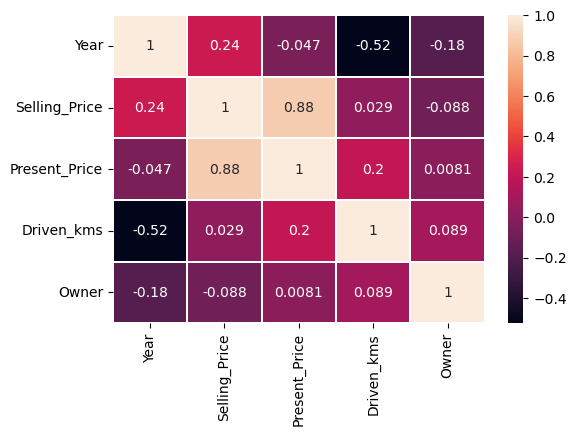

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(car.corr(),annot=True,linewidth=(0.1))
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(car['Year'],kde=True,color='orange')
plt.xlabel=('Year')
plt.ylabel=('Frequency')
plt.title('Distribution of Cars')
plt.show()

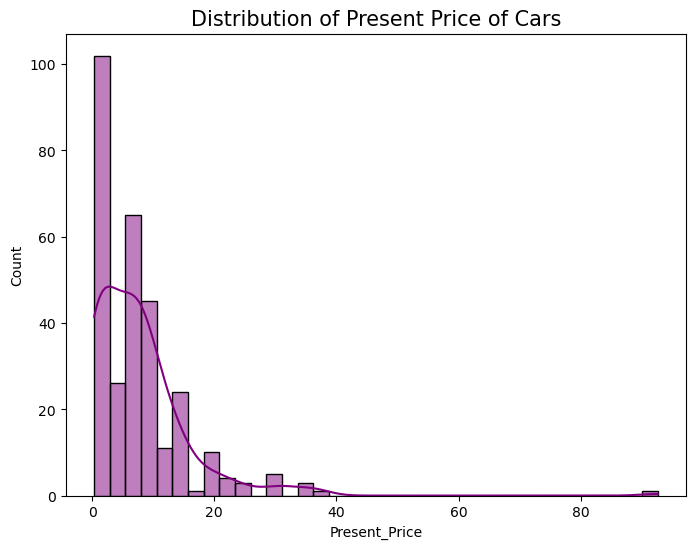

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(car['Present_Price'],kde=True,color='purple')
plt.xlabel=('Present_Price')
plt.ylabel=('Frequency')
plt.title('Distribution of Present Price of Cars', fontsize=(15))
plt.show()

In [9]:
car.dropna(inplace=True)
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
x=car[['Year','Present_Price','Driven_kms','Owner']]
y=car['Selling_Price']

In [11]:
car = pd.get_dummies(car, columns=['Fuel_Type','Selling_type','Transmission'], drop_first=True)
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,1,0,1
298,city,2009,3.35,11.00,87934,0,0,1,0,1
299,city,2017,11.50,12.50,9000,0,1,0,0,1


In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=50)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()

In [64]:
model.fit(xtrain,ytrain)

LinearRegression()

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [66]:
pred=model.predict(xtest)

In [68]:
MAE=mean_absolute_error(ytest,pred)
MSE=mean_squared_error(ytest,pred)
RMSE=mean_squared_error(ytest,pred,squared=False)
r2=r2_score(ytest,pred)
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-Squared (R2) Score: {r2}")

Mean Absolute Error: 1.23277573649209
Mean Squared Error: 3.4763570459987263
Root Mean Squared Error: 1.8644991407878755
R-Squared (R2) Score: 0.8343572192319015


In [69]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
model=RandomForestRegressor(n_estimators=100, random_state=50)
model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=50)

In [76]:
pred=model.predict(xtest)

In [77]:
MAE=mean_absolute_error(ytest,pred)
MSE=mean_squared_error(ytest,pred)
RMSE=mean_squared_error(ytest,pred,squared=False)
r2=r2_score(ytest,pred)
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-Squared (R2) Score: {r2}")

Mean Absolute Error: 0.6189314049586779
Mean Squared Error: 1.1608161670247932
Root Mean Squared Error: 1.077411790832453
R-Squared (R2) Score: 0.9446889904223541
